# CMSE 831 Final Project
### &#9989; Aarthi Padmanabhan
#### &#9989; 12/09/2024

# Optimizing Vehicle Routes: A Solution to the Capacitated Vehicle Routing Problem with Time Windows

## Background and Motivation

Efficient logistics and transportation are critical challenges faced by businesses in industries such as retail, e-commerce, and supply chain management. The Capacitated Vehicle Routing Problem with Time Windows (CVRPTW) is a classic combinatorial optimization problem that models real-world scenarios where a fleet of vehicles must deliver goods to customers while minimizing operational costs. Each vehicle operates under capacity constraints, and customers must be served within predefined time windows, adding complexity to the problem.

With the rapid growth of e-commerce and just-in-time delivery services, solving CVRPTW effectively has become increasingly important to reduce transportation costs, minimize environmental impact, and improve customer satisfaction. However, finding optimal solutions is computationally challenging due to the large solution space and multiple constraints.

This project focuses on addressing one main question:
1. How can we design efficient vehicle routes to minimize total travel distance while meeting capacity and time window constraints?

By tackling this question, this project aims to provide insights into solving real-world logistics problems using efficient heuristic methods and to identify areas for further improvement or exploration in routing optimization.

## Methodology

### Loading and Inspecting the Dataset

The Capacitated Vehicle Routing Problem with Time Windows (CVRPTW) dataset models a logistics problem where a fleet of vehicles must deliver goods to a set of customers while meeting specific constraints. Each customer has a demand, a location, and a time window within which the delivery must occur. Vehicles have limited capacity and start and end their routes at a depot. The dataset includes information about customer locations, demands, time windows, and vehicle capacity, making it a practical benchmark for evaluating optimization algorithms in real-world scenarios, such as last-mile delivery and logistics planning.

In [39]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from data_generator import CVRPTW_SET

# Function to load a single dataset
def load_data(file_path):
    """
    Loads a pickle file containing CVRPTW dataset.

    Parameters:
        file_path (str): The path to the dataset file.

    Returns:
        data (list): The loaded dataset containing CVRPTW instances.
    """
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return data

# Function to inspect a single dataset
def inspect_dataset(data):
    """
    Inspects the dataset by checking size, attributes of instances, and example data.

    Parameters:
        data (list): The dataset containing CVRPTW instances.

    Returns:
        None
    """
    print(f"Total number of instances in the dataset: {len(data)}")
    first_instance = data[0]
    print("\nAttributes of a single instance:")
    print(dir(first_instance))

    # Inspect key attributes
    print("\nDepot Location:", first_instance.depot_loc)
    print("Depot Time Window:", first_instance.depot_tw)
    print("Vehicle Capacity:", first_instance.capacity)
    print("Service Window:", first_instance.service_window)

    print("\nNumber of Customer Nodes:", len(first_instance.node_loc))
    print("Example Customer Locations:", first_instance.node_loc[:])
    print("Example Demands:", first_instance.demand[:])
    print("Example Time Windows:", first_instance.node_tw[:])

In [40]:
# Paths to datasets
file_paths = {
    "20": "/Users/aarthipadmanabhan/data/cvrptw/cvrptw20_test_seed1234.pkl",
    "50": "/Users/aarthipadmanabhan/data/cvrptw/cvrptw50_test_seed1234.pkl",
    "100": "/Users/aarthipadmanabhan/data/cvrptw/cvrptw100_test_seed1234.pkl"
}

# Load all datasets
datasets = {}
for size, path in file_paths.items():
    datasets[size] = load_data(path)
    print(f"Loaded dataset with size {size}: {len(datasets[size])} instances.")

# Inspect the dataset with 20 nodes
print("\nInspecting dataset with 20 nodes...")
inspect_dataset(datasets["20"])

Loaded dataset with size 20: 10000 instances.
Loaded dataset with size 50: 10000 instances.
Loaded dataset with size 100: 10000 instances.

Inspecting dataset with 20 nodes...
Total number of instances in the dataset: 10000

Attributes of a single instance:
['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__match_args__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_asdict', '_field_defaults', '_fields', '_make', '_replace', 'capacity', 'count', 'demand', 'depot_loc', 'depot_tw', 'durations', 'index', 'node_loc', 'node_tw', 'service_window', 'time_factor']

Depot Location: [0.11428677655542563, 0.4206339476176

The dataset contains instances of the Capacitated Vehicle Routing Problem with Time Windows (CVRPTW), each representing a depot and a set of customer nodes with specific locations, demands, and time windows. Vehicles with fixed capacities must serve customers while minimizing total travel distance and adhering to constraints. The dataset includes problem sizes with 20, 50, and 100 customer nodes, offering diverse scenarios for testing routing algorithms.

### Visualizations

**Node visualization**

The node visualization provides an overview of the spatial distribution of the depot and customer nodes within the dataset.

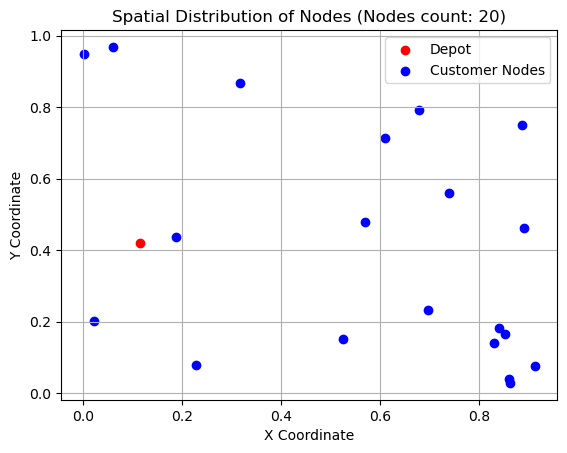

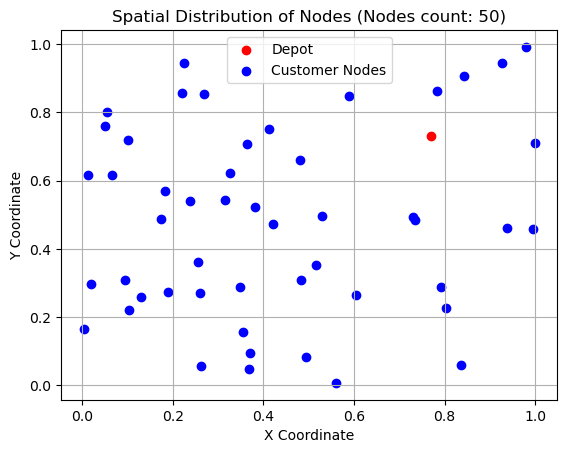

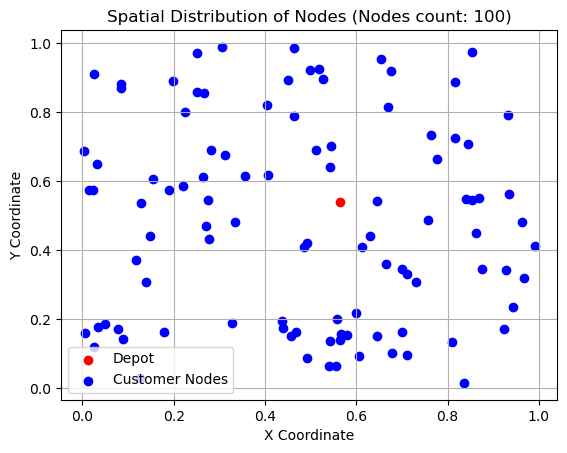

In [41]:
import matplotlib.pyplot as plt

def plot_node_locations(instance, size):
    """
    Visualize the depot and customer node locations for a specific dataset size.

    Parameters:
        instance: A single CVRPTW instance.
        size (int): The size of the dataset (number of customer nodes).
    """
    depot = instance.depot_loc
    customers = instance.node_loc

    # Plot depot
    plt.scatter(depot[0], depot[1], color='red', label='Depot', zorder=5)

    # Plot customers
    customer_x = [loc[0] for loc in customers]
    customer_y = [loc[1] for loc in customers]
    plt.scatter(customer_x, customer_y, color='blue', label='Customer Nodes')

    # Add labels, title, and legend
    plt.title(f"Spatial Distribution of Nodes (Nodes count: {size})")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage: Plot for all datasets
for size, dataset in datasets.items():
    plot_node_locations(dataset[0], size)  # Plot for the first instance in each dataset

The spatial distribution of nodes illustrates the geographic layout of customer locations (blue dots) relative to the depot (red dot). The nodes are scattered across the area, with varying densities in different regions. This spread of customer nodes highlights the complexity of routing decisions, as some areas have clusters of nodes requiring shorter travel distances, while others are more isolated, increasing route complexity. Such distributions impact the efficiency of algorithms, requiring careful optimization to minimize total travel distance while meeting constraints like vehicle capacity and service time windows.

**Demand distribution**

The demand distribution visualization offers insights into the range and frequency of customer demands in the dataset.

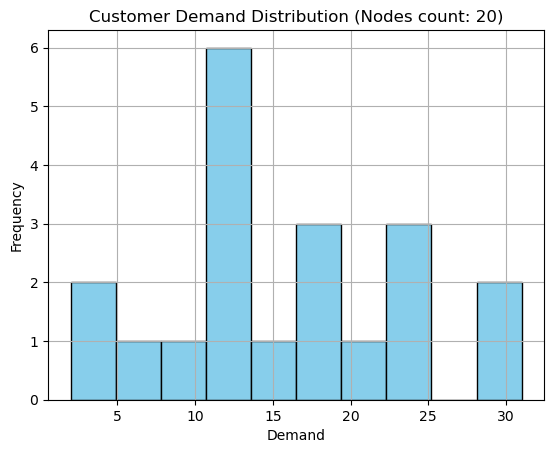

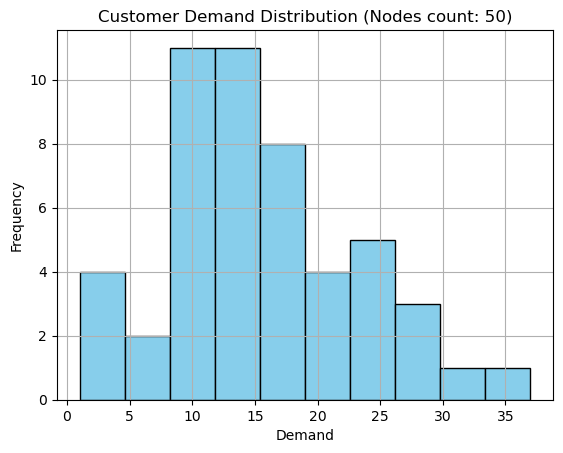

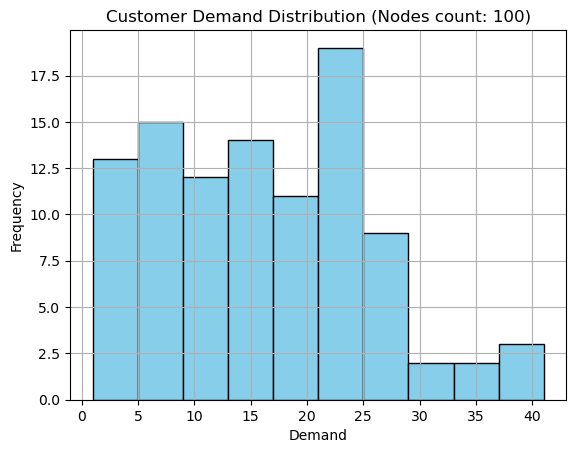

In [42]:
import matplotlib.pyplot as plt

def plot_demand_distribution(instance, size):
    """
    Plot the distribution of customer demands for a specific dataset size.

    Parameters:
        instance: A single CVRPTW instance.
        size (int): The size of the dataset (number of customer nodes).
    """
    demands = instance.demand

    # Plot histogram
    plt.hist(demands, bins=10, color='skyblue', edgecolor='black')

    # Add labels, title, and grid
    plt.title(f"Customer Demand Distribution (Nodes count: {size})")
    plt.xlabel("Demand")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Example usage: Plot for all datasets
for size, dataset in datasets.items():
    plot_demand_distribution(dataset[0], size)  # Plot for the first instance in each dataset

The demand distribution across the 20, 50, and 100-node datasets reveals valuable insights into customer demand patterns. For the 20-node dataset, customer demands are concentrated around mid-range values, primarily between 10 and 15, with fewer instances of higher demands above 20. As the dataset size increases to 50 nodes, a similar pattern emerges, with a broader spread and a notable frequency of demands in the 10 to 20 range, alongside occasional higher demands approaching 30. The 100-node dataset further broadens the demand range, with a peak around 15 to 20 and a gradual decline for larger demands, indicating greater complexity in balancing routes. These patterns suggest that while mid-sized demands dominate, larger datasets introduce higher variability, necessitating careful route planning to optimize vehicle capacity and delivery efficiency. This highlights the scalability challenges that optimization algorithms must address in larger, more diverse datasets.

**Time Window Visualization**

The time window visualization provides insights into the service time constraints for each customer.

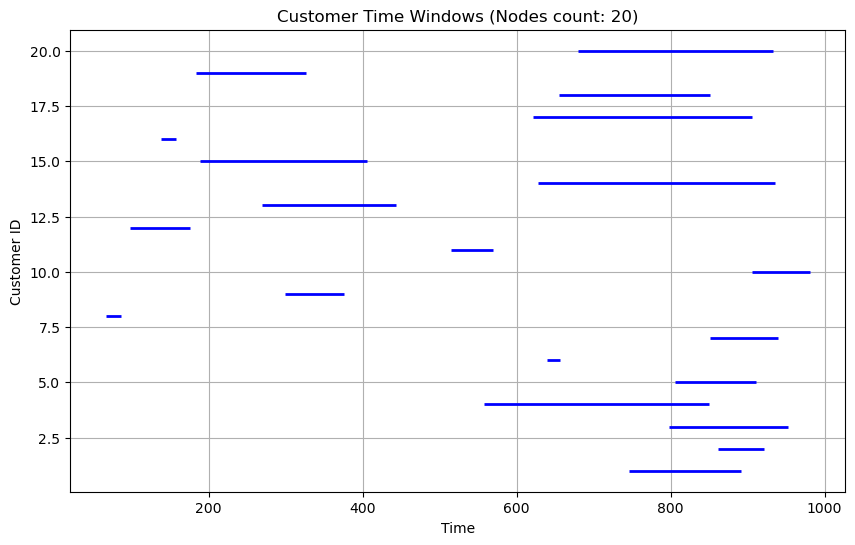

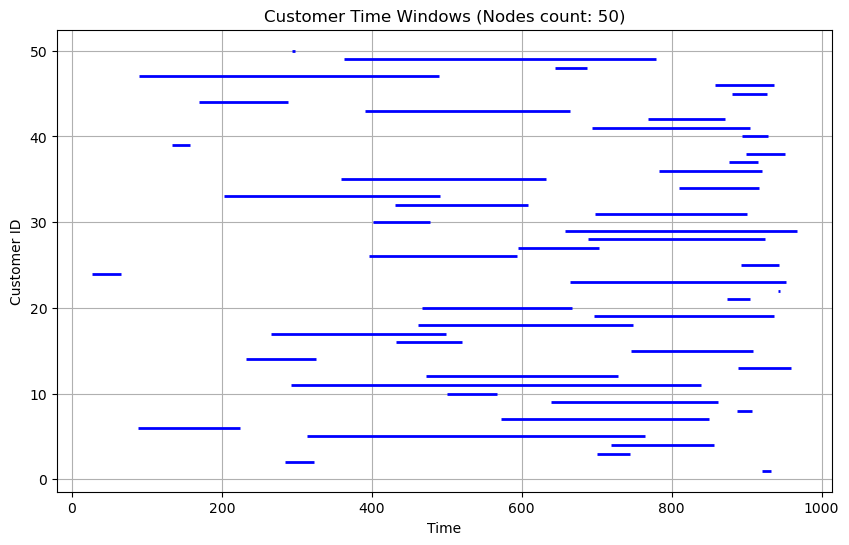

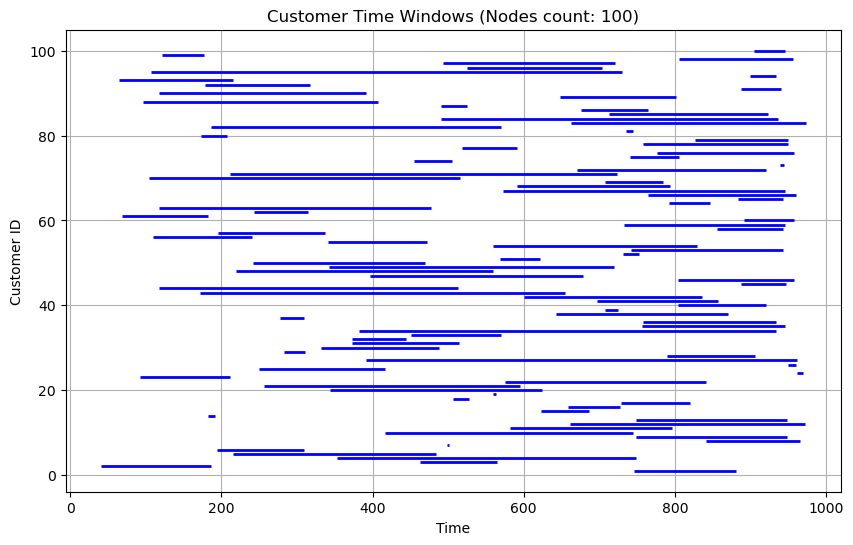

In [43]:
import matplotlib.pyplot as plt

def plot_time_windows(instance, size):
    """
    Visualize the time windows of customers for a specific dataset size.

    Parameters:
        instance: A single CVRPTW instance.
        size (int): The size of the dataset (number of customer nodes).
    """
    time_windows = instance.node_tw
    customer_ids = range(1, len(time_windows) + 1)  # Start customer IDs from 1

    # Plot time windows as horizontal bars
    plt.figure(figsize=(10, 6))
    for i, tw in enumerate(time_windows):
        plt.hlines(y=customer_ids[i], xmin=tw[0], xmax=tw[1], color='blue', linewidth=2)
    
    # Add labels, title, and grid
    plt.title(f"Customer Time Windows (Nodes count: {size})")
    plt.xlabel("Time")
    plt.ylabel("Customer ID")
    plt.grid(True)
    plt.show()

# Example usage: Plot for all datasets
for size, dataset in datasets.items():
    plot_time_windows(dataset[0], size)  # Plot for the first instance in each dataset

The visualizations depicts the time windows for customers, with each horizontal bar representing the allowable time frame within which a customer must be served. The charts reveals several overlapping time windows, indicating increased complexity in scheduling and the potential need for careful sequencing of routes to meet these constraints. Additionally, certain time windows are tightly bound, requiring precise routing to ensure on-time delivery.

**Methodologies considered**

This project employs **Ant Colony Optimization (ACO)** and **Tabu Search (TS)** to address the CVRPTW dataset. 

1. ACO, inspired by the foraging behavior of ants, is well-suited for routing problems due to its use of pheromone trails and heuristic guidance to optimize routes dynamically. 
2. Tabu Search, on the other hand, excels in refining solutions through an iterative local search while avoiding previously explored paths using a memory-based Tabu List. 

These methodologies were chosen for their ability to handle the dataset's constraints, such as vehicle capacity and time windows, and provide a balance between global exploration and local optimization.

### Ant Colony Optimization (ACO)

In [44]:
import numpy as np
import random

def ant_colony_optimization(cvrptw_instance, num_ants, max_iter, alpha, beta, rho, q):
    """
    Implements Ant Colony Optimization for the CVRPTW problem with convergence tracking.

    Parameters:
        cvrptw_instance: A single CVRPTW instance.
        num_ants (int): Number of ants.
        max_iter (int): Number of iterations.
        alpha (float): Pheromone importance factor.
        beta (float): Heuristic importance factor.
        rho (float): Pheromone evaporation rate.
        q (float): Pheromone update factor.

    Returns:
        best_solution (list): Best solution (routes).
        best_distance (float): Total distance of the best solution.
        convergence (list): Best distance at each iteration.
    """
    # Extract instance data
    locations = np.array([cvrptw_instance.depot_loc] + cvrptw_instance.node_loc)
    demands = [0] + cvrptw_instance.demand  # Include depot demand
    time_windows = [cvrptw_instance.depot_tw] + cvrptw_instance.node_tw
    service_window = cvrptw_instance.service_window
    vehicle_capacity = cvrptw_instance.capacity
    num_nodes = len(locations)

    # Initialize pheromone levels and heuristic matrix
    pheromones = np.ones((num_nodes, num_nodes))
    distance_matrix = np.linalg.norm(
        locations[:, None, :] - locations[None, :, :], axis=-1
    )
    heuristic = 1 / (distance_matrix + 1e-10)  # Inverse of distance

    # Initialize best solution
    best_solution = None
    best_distance = float("inf")
    convergence = []  # Track best distance at each iteration

    for iteration in range(max_iter):
        solutions = []
        distances = []

        for ant in range(num_ants):
            # Create a solution for each ant
            solution, total_distance = construct_solution(
                pheromones, heuristic, distance_matrix, demands, time_windows,
                vehicle_capacity, service_window, alpha, beta
            )
            solutions.append(solution)
            distances.append(total_distance)

            # Update best solution
            if total_distance < best_distance:
                best_solution = solution
                best_distance = total_distance

        # Track convergence
        convergence.append(best_distance)

        # Update pheromone levels
        pheromones = (1 - rho) * pheromones  # Evaporation
        for solution, distance in zip(solutions, distances):
            for route in solution:
                for i in range(len(route) - 1):
                    pheromones[route[i], route[i + 1]] += q / distance

    return best_solution, best_distance, convergence

def construct_solution(pheromones, heuristic, distance_matrix, demands, time_windows, vehicle_capacity, service_window, alpha, beta):
    """
    Constructs a solution for a single ant.

    Returns:
        solution (list of lists): Routes for all vehicles.
        total_distance (float): Total distance traveled.
    """
    num_nodes = len(demands)
    unvisited = set(range(1, num_nodes))  # Customers to visit
    solution = []
    total_distance = 0

    while unvisited:
        route = [0]  # Start from depot
        current_load = 0
        current_time = 0

        while unvisited:
            current_node = route[-1]
            probabilities = []

            # Calculate probabilities for next node
            for next_node in unvisited:
                if (
                    current_load + demands[next_node] <= vehicle_capacity
                    and current_time + distance_matrix[current_node, next_node] <= time_windows[next_node][1]
                ):
                    pheromone = pheromones[current_node, next_node] ** alpha
                    heuristic_value = heuristic[current_node, next_node] ** beta
                    probabilities.append((next_node, pheromone * heuristic_value))
                else:
                    probabilities.append((next_node, 0))  # Infeasible move

            # Normalize probabilities
            total_probability = sum(prob[1] for prob in probabilities)
            if total_probability == 0:
                break  # No feasible moves
            probabilities = [(node, prob / total_probability) for node, prob in probabilities]

            # Select next node
            next_node = random.choices(
                [prob[0] for prob in probabilities], weights=[prob[1] for prob in probabilities]
            )[0]

            # Update route
            route.append(next_node)
            current_load += demands[next_node]
            current_time = max(current_time + distance_matrix[current_node, next_node], time_windows[next_node][0])

            unvisited.remove(next_node)

        # Add depot to end route
        route.append(0)
        total_distance += sum(
            distance_matrix[route[i], route[i + 1]] for i in range(len(route) - 1)
        )
        solution.append(route)

    return solution, total_distance

### Tabu search (TS)

In [45]:
import random
import numpy as np

def tabu_search(cvrptw_instance, max_iter, tabu_size):
    """
    Implements Tabu Search for the CVRPTW problem with convergence tracking.

    Parameters:
        cvrptw_instance: A single CVRPTW instance.
        max_iter (int): Number of iterations.
        tabu_size (int): Maximum size of the Tabu List.

    Returns:
        best_solution (list): Best solution (routes).
        best_distance (float): Total distance of the best solution.
        convergence (list): List of best distances at each iteration.
    """
    # Extract instance data
    locations = np.array([cvrptw_instance.depot_loc] + cvrptw_instance.node_loc)
    demands = [0] + cvrptw_instance.demand  # Include depot demand
    time_windows = [cvrptw_instance.depot_tw] + cvrptw_instance.node_tw
    service_window = cvrptw_instance.service_window
    vehicle_capacity = cvrptw_instance.capacity
    num_nodes = len(locations)

    # Calculate distance matrix
    distance_matrix = np.linalg.norm(
        locations[:, None, :] - locations[None, :, :], axis=-1
    )

    # Initialize Tabu List, solutions, and convergence tracking
    tabu_list = []
    current_solution = initial_solution(num_nodes, vehicle_capacity, demands, time_windows, distance_matrix)
    best_solution = current_solution
    best_distance = evaluate_solution(current_solution, distance_matrix)
    convergence = [best_distance]

    for iteration in range(max_iter):
        # Generate neighbors
        neighbors = generate_neighbors(current_solution, num_nodes, vehicle_capacity, demands, time_windows, distance_matrix)

        # Find the best neighbor that is not in the Tabu List
        best_neighbor = None
        best_neighbor_distance = float("inf")
        for neighbor in neighbors:
            if neighbor not in tabu_list:
                neighbor_distance = evaluate_solution(neighbor, distance_matrix)
                if neighbor_distance < best_neighbor_distance:
                    best_neighbor = neighbor
                    best_neighbor_distance = neighbor_distance

        # If no feasible neighbor is found, skip the iteration
        if best_neighbor is None:
            continue

        # Update current solution and Tabu List
        current_solution = best_neighbor
        if best_neighbor_distance < best_distance:
            best_solution = best_neighbor
            best_distance = best_neighbor_distance

        tabu_list.append(current_solution)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)  # Remove oldest element from Tabu List

        # Track convergence
        convergence.append(best_distance)

    return best_solution, best_distance, convergence

def initial_solution(num_nodes, vehicle_capacity, demands, time_windows, distance_matrix):
    """
    Generates an initial feasible solution.

    Returns:
        solution (list of lists): Initial routes.
    """
    unvisited = set(range(1, num_nodes))  # Customers to visit
    solution = []

    while unvisited:
        route = [0]  # Start from depot
        current_load = 0
        current_time = 0

        while unvisited:
            current_node = route[-1]
            feasible_customers = []

            # Find feasible customers
            for next_node in unvisited:
                if (
                    current_load + demands[next_node] <= vehicle_capacity and
                    current_time + distance_matrix[current_node, next_node] <= time_windows[next_node][1]
                ):
                    feasible_customers.append(next_node)

            if not feasible_customers:
                break  # No feasible customers to add

            # Select the next customer (greedy choice: closest customer)
            next_node = min(
                feasible_customers,
                key=lambda node: distance_matrix[current_node, node]
            )

            # Update route
            route.append(next_node)
            current_load += demands[next_node]
            current_time = max(current_time + distance_matrix[current_node, next_node], time_windows[next_node][0])
            unvisited.remove(next_node)

        # Add depot to end route
        route.append(0)
        solution.append(route)

    return solution

def generate_neighbors(solution, num_nodes, vehicle_capacity, demands, time_windows, distance_matrix):
    """
    Generates neighbors of the current solution by swapping nodes.

    Returns:
        neighbors (list of lists): List of neighboring solutions.
    """
    neighbors = []

    for route_index, route in enumerate(solution):
        for i in range(1, len(route) - 1):  # Skip depot (index 0 and last index)
            for j in range(i + 1, len(route) - 1):
                # Swap nodes
                new_route = route[:]
                new_route[i], new_route[j] = new_route[j], new_route[i]

                # Check feasibility
                if is_feasible(new_route, vehicle_capacity, demands, time_windows, distance_matrix):
                    new_solution = solution[:]
                    new_solution[route_index] = new_route
                    neighbors.append(new_solution)

    return neighbors

def is_feasible(route, vehicle_capacity, demands, time_windows, distance_matrix):
    """
    Checks if a route is feasible considering capacity and time windows.

    Returns:
        bool: True if feasible, False otherwise.
    """
    current_load = 0
    current_time = 0

    for i in range(len(route) - 1):
        current_load += demands[route[i]]
        if current_load > vehicle_capacity:
            return False

        travel_time = distance_matrix[route[i], route[i + 1]]
        current_time = max(current_time + travel_time, time_windows[route[i]][0])

        if current_time > time_windows[route[i + 1]][1]:
            return False

    return True

def evaluate_solution(solution, distance_matrix):
    """
    Evaluates the total distance of a solution.

    Returns:
        total_distance (float): Total distance of the solution.
    """
    total_distance = 0

    for route in solution:
        for i in range(len(route) - 1):
            total_distance += distance_matrix[route[i], route[i + 1]]

    return total_distance

## Results

**Ant Colony Optimization (ACO)**

In [47]:
# Run ACO for each dataset size and store results
for size in ["20", "50", "100"]:
    print(f"\nRunning ACO for dataset size {size} nodes...")
    best_solution, best_distance, convergence = ant_colony_optimization(
        datasets[size][0], num_ants, max_iter_aco, alpha, beta, rho, q
    )
    aco_results[size] = {
        "solution": best_solution,
        "distance": best_distance,
        "convergence": convergence
    }

    # Print ACO results
    print(f"Node Size: {size} Nodes")
    print("ACO Best Solution:", best_solution)
    print("ACO Best Distance:", best_distance)


Running ACO for dataset size 20 nodes...
Node Size: 20 Nodes
ACO Best Solution: [[0, 10, 3, 7, 5, 2, 20, 14, 0], [0, 16, 12, 15, 13, 19, 4, 17, 1, 18, 0], [0, 8, 9, 11, 6, 0]]
ACO Best Distance: 7.761664193836461

Running ACO for dataset size 50 nodes...
Node Size: 50 Nodes
ACO Best Solution: [[0, 33, 43, 32, 20, 38, 8, 36, 45, 25, 46, 40, 37, 31, 41, 15, 34, 28, 1, 22, 13, 23, 29, 0], [0, 47, 14, 2, 11, 19, 3, 12, 27, 18, 4, 42, 9, 21, 0], [0, 6, 30, 49, 26, 5, 7, 48, 0], [0, 24, 39, 44, 50, 17, 16, 10, 35, 0]]
ACO Best Distance: 13.692699053597988

Running ACO for dataset size 100 nodes...
Node Size: 100 Nodes
ACO Best Solution: [[0, 2, 97, 71, 49, 21, 17, 34, 35, 73, 59, 45, 67, 46, 12, 27, 8, 83, 78, 79, 9, 53, 13, 26, 24, 0], [0, 80, 29, 41, 16, 95, 42, 52, 68, 10, 89, 40, 72, 36, 91, 85, 58, 100, 28, 84, 98, 65, 76, 66, 60, 94, 0], [0, 56, 62, 74, 77, 19, 20, 38, 22, 75, 64, 54, 11, 1, 0], [0, 99, 3, 5, 33, 82, 31, 63, 50, 44, 7, 86, 81, 69, 4, 0], [0, 43, 14, 92, 25, 88, 90, 57

The results for the Ant Colony Optimization (ACO) demonstrate the algorithm's capability to find optimized solutions for the Capacitated Vehicle Routing Problem with Time Windows (CVRPTW) across different dataset sizes. For the 20-node dataset, ACO achieved a total distance of 7.76 using 3 routes. As the problem complexity increases with 50 and 100 nodes, the algorithm adapts by generating solutions with 4 and 8 routes, respectively, achieving distances of 13.69 and 23.67. These results highlight ACO's ability to effectively balance the constraints of vehicle capacity and time windows while minimizing the total travel distance, with performance gradually scaling as the dataset size grows.

**Tabu search (TS)**

In [49]:
# Tabu Search parameters
max_iter_tabu = 50
tabu_size = 10

# Initialize result dictionaries
tabu_results = {}

# Run Tabu Search for each dataset size and store results
for size in ["20", "50", "100"]:
    print(f"\nRunning Tabu Search for dataset size {size} nodes...")
    
    # Unpack results, including convergence data
    best_solution, best_distance, convergence = tabu_search(
        datasets[size][0], max_iter_tabu, tabu_size
    )
    
    tabu_results[size] = {
        "solution": best_solution,
        "distance": best_distance,
        "convergence": convergence
    }

    # Print Tabu Search results
    print(f"Node Size: {size} Nodes")
    print("Tabu Search Best Solution:", best_solution)
    print("Tabu Search Best Distance:", best_distance)


Running Tabu Search for dataset size 20 nodes...
Node Size: 20 Nodes
Tabu Search Best Solution: [[0, 10, 3, 7, 5, 2, 20, 14, 0], [0, 16, 4, 17, 1, 18, 0], [0, 8, 9, 11, 6, 0], [0, 12, 15, 13, 19, 0]]
Tabu Search Best Distance: 9.25721690964511

Running Tabu Search for dataset size 50 nodes...
Node Size: 50 Nodes
Tabu Search Best Solution: [[0, 33, 43, 32, 20, 38, 8, 36, 45, 25, 46, 40, 37, 31, 41, 15, 28, 1, 22, 13, 23, 29, 0], [0, 7, 49, 26, 5, 9, 42, 21, 34, 19, 0], [0, 24, 6, 30, 47, 3, 27, 4, 12, 18, 11, 0], [0, 10, 16, 48, 0], [0, 50, 14, 17, 35, 0], [0, 2, 44, 0], [0, 39, 0]]
Tabu Search Best Distance: 16.48575084766051

Running Tabu Search for dataset size 100 nodes...
Node Size: 100 Nodes
Tabu Search Best Solution: [[0, 2, 80, 29, 41, 16, 26, 24, 83, 8, 27, 12, 0], [0, 1, 94, 46, 67, 91, 36, 72, 40, 34, 45, 35, 73, 59, 58, 100, 98, 60, 66, 76, 65, 13, 53, 78, 79, 9, 0], [0, 11, 54, 49, 71, 97, 85, 75, 22, 28, 84, 38, 64, 17, 89, 42, 0], [0, 43, 14, 63, 31, 50, 20, 44, 4, 7, 86

The results for Tabu Search (TS) illustrate its ability to generate feasible solutions for the CVRPTW across varying dataset sizes, though with slightly higher distances compared to ACO. For the 20-node dataset, TS produced a solution with 4 routes and a total distance of 9.26. As the problem complexity increased, TS generated solutions with 7 routes for the 50-node dataset (distance: 16.49) and 10 routes for the 100-node dataset (distance: 28.12). These results highlight TS's iterative exploration of solution spaces and its focus on avoiding cycling through already-visited solutions, which helps in handling larger datasets while adhering to capacity and time window constraints. However, its performance in terms of minimizing the total distance slightly lags behind ACO, indicating differences in algorithmic behavior and optimization strategies.

**Total Distance Comparison between ACO and TS**

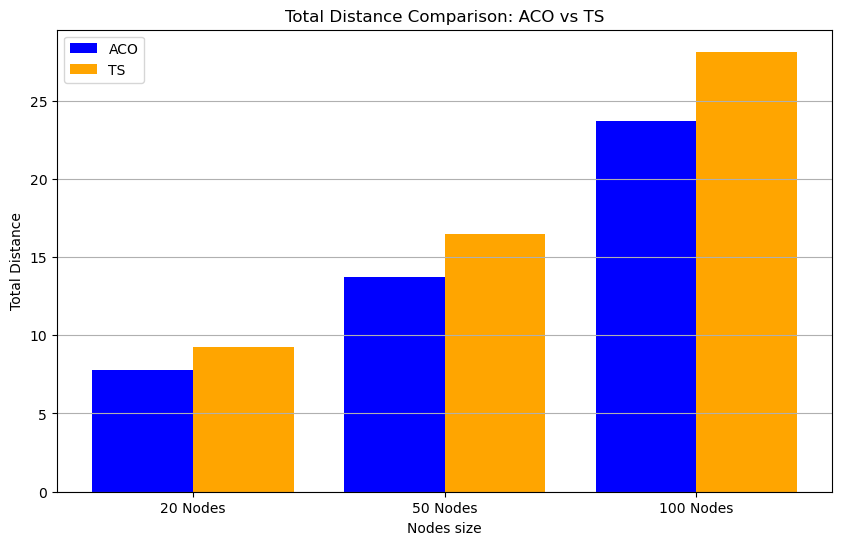

In [55]:
import matplotlib.pyplot as plt

# Extract distances for visualization
dataset_sizes = ["20 Nodes", "50 Nodes", "100 Nodes"]
aco_distances = [aco_results[size]["distance"] for size in ["20", "50", "100"]]
tabu_distances = [tabu_results[size]["distance"] for size in ["20", "50", "100"]]

# Plot Total Distance Comparison
plt.figure(figsize=(10, 6))
x = range(len(dataset_sizes))
plt.bar(x, aco_distances, width=0.4, label="ACO", color="blue", align="center")
plt.bar([i + 0.4 for i in x], tabu_distances, width=0.4, label="TS", color="orange", align="center")

# Add labels and title
plt.xticks([i + 0.2 for i in x], dataset_sizes)
plt.xlabel("Nodes size")
plt.ylabel("Total Distance")
plt.title("Total Distance Comparison: ACO vs TS")
plt.legend()
plt.grid(axis="y")

plt.show()

The bar chart compares the total travel distances obtained by Ant Colony Optimization (ACO) and Tabu Search (TS) across datasets with 20, 50, and 100 nodes. For the smallest dataset (20 nodes), ACO achieves a shorter total distance compared to TS, indicating its superior ability to explore the solution space for smaller problems effectively. As the dataset size increases to 50 and 100 nodes, ACO consistently maintains a better performance, with shorter travel distances than TS. However, the performance gap narrows with larger datasets, suggesting that the complexity of the problem affects the relative efficiency of the two algorithms. Overall, ACO demonstrates more robust results across different dataset sizes, likely due to its probabilistic approach to exploration and exploitation.

**Number of routes comparison between ACO and TS**

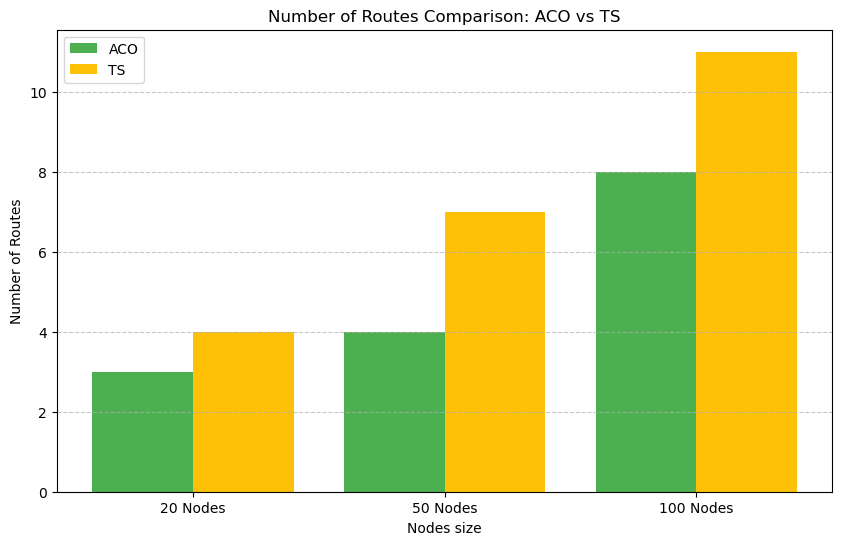

In [54]:
# Extract number of routes for visualization
aco_routes = [len(aco_results[size]["solution"]) for size in ["20", "50", "100"]]
tabu_routes = [len(tabu_results[size]["solution"]) for size in ["20", "50", "100"]]

# Plot Number of Routes Comparison
plt.figure(figsize=(10, 6))
x = range(len(dataset_sizes))
plt.bar(x, aco_routes, width=0.4, label="ACO", color="#4CAF50", align="center")  # Green for ACO
plt.bar([i + 0.4 for i in x], tabu_routes, width=0.4, label="TS", color="#FFC107", align="center")  # Yellow for TS

# Add labels and title
plt.xticks([i + 0.2 for i in x], dataset_sizes)
plt.xlabel("Nodes size")
plt.ylabel("Number of Routes")
plt.title("Number of Routes Comparison: ACO vs TS")
plt.legend()
plt.grid(axis="y", linestyle='--', alpha=0.7)

plt.show()

The bar chart compares the number of routes generated by Ant Colony Optimization (ACO) and Tabu Search (TS) for datasets with 20, 50, and 100 nodes. For the 20-node dataset, ACO consistently requires fewer routes compared to TS, indicating its efficiency in consolidating customer deliveries into fewer trips while adhering to constraints such as vehicle capacity and time windows. As the dataset size increases to 50 and 100 nodes, ACO continues to produce fewer routes than TS, highlighting its ability to optimize route allocation effectively for larger problems. The significant difference in the number of routes for larger datasets suggests that TS may struggle to balance the constraints, leading to more fragmented routing solutions. This comparison underscores the strength of ACO in minimizing the number of routes required for delivery, which directly impacts operational costs and efficiency.

**Optimized routes visualization**

In [52]:
# Function to visualize routes with improved colors and aesthetics
def plot_routes(instance, solution, title):
    """
    Visualize the routes for a given solution with improved colors and styles.

    Parameters:
        instance: A single CVRPTW instance.
        solution (list): The solution (routes).
        title (str): The title of the plot.
    """
    depot = instance.depot_loc
    customers = instance.node_loc

    plt.figure(figsize=(12, 8))

    # Plot depot
    plt.scatter(depot[0], depot[1], color="#FF0000", label='Depot', s=150, zorder=5)  # Red depot

    # Plot customers
    customer_x = [loc[0] for loc in customers]
    customer_y = [loc[1] for loc in customers]
    plt.scatter(customer_x, customer_y, color="#2196F3", label='Customer Nodes', s=50)  # Blue customers

    # Plot routes
    colors = ['#4CAF50', '#FFC107', '#9C27B0', '#FF5722', '#00BCD4', '#8BC34A', '#3F51B5', '#E91E63']
    for i, route in enumerate(solution):
        route_coords = [depot] + [customers[node - 1] for node in route[1:-1]] + [depot]
        route_x = [coord[0] for coord in route_coords]
        route_y = [coord[1] for coord in route_coords]
        plt.plot(route_x, route_y, marker='o', label=f"Route {i + 1}", color=colors[i % len(colors)])

    # Add labels and legend
    plt.title(title, fontsize=16)
    plt.xlabel("X Coordinate", fontsize=12)
    plt.ylabel("Y Coordinate", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

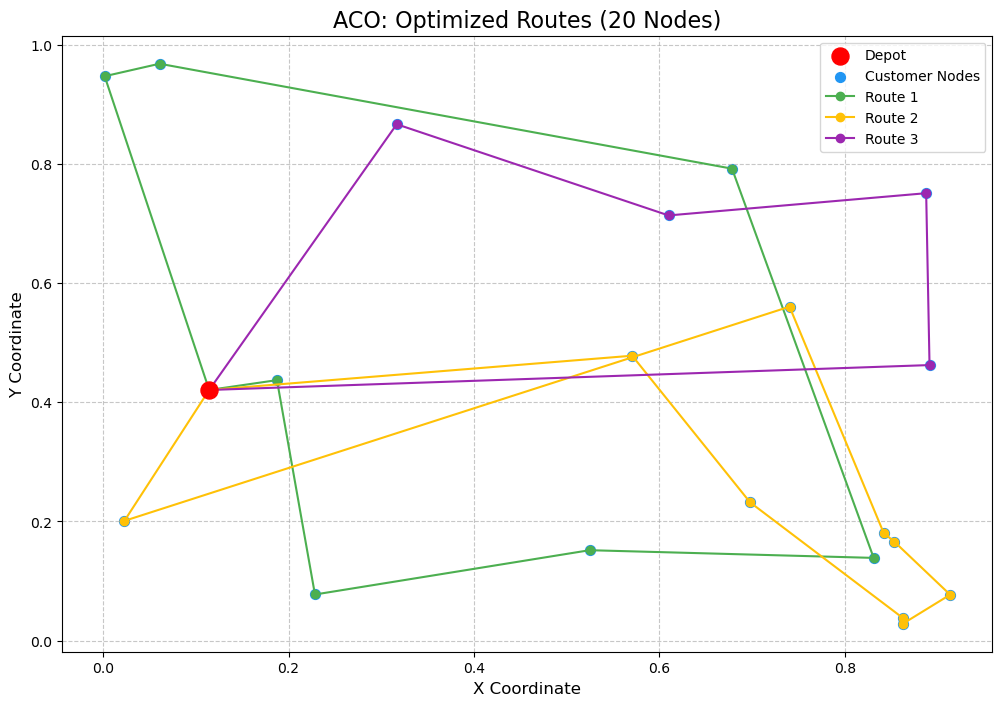

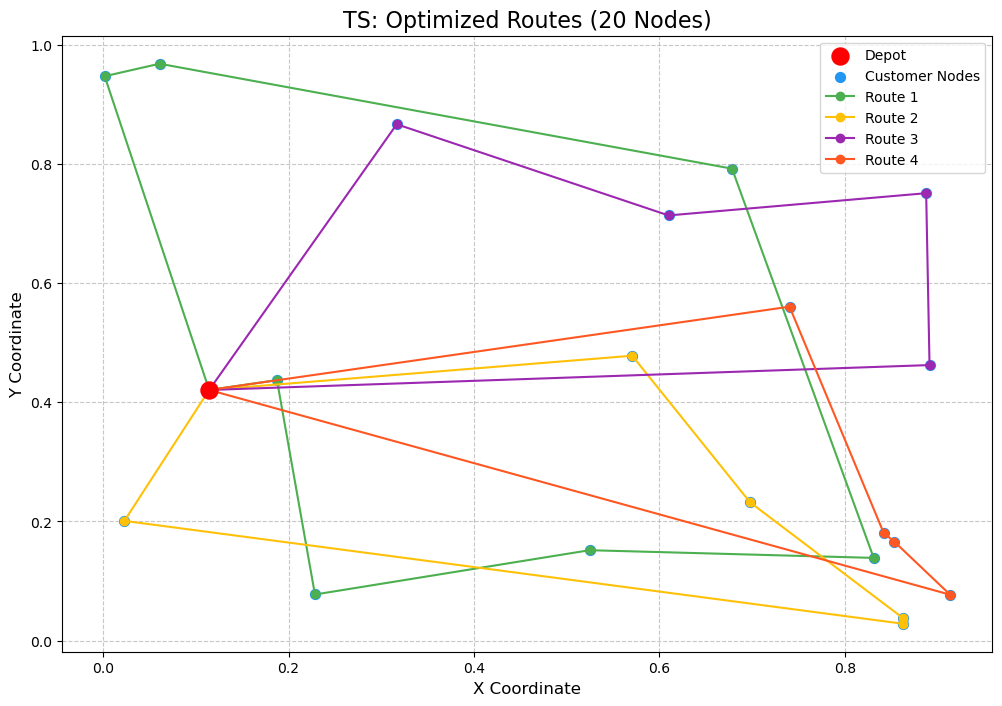

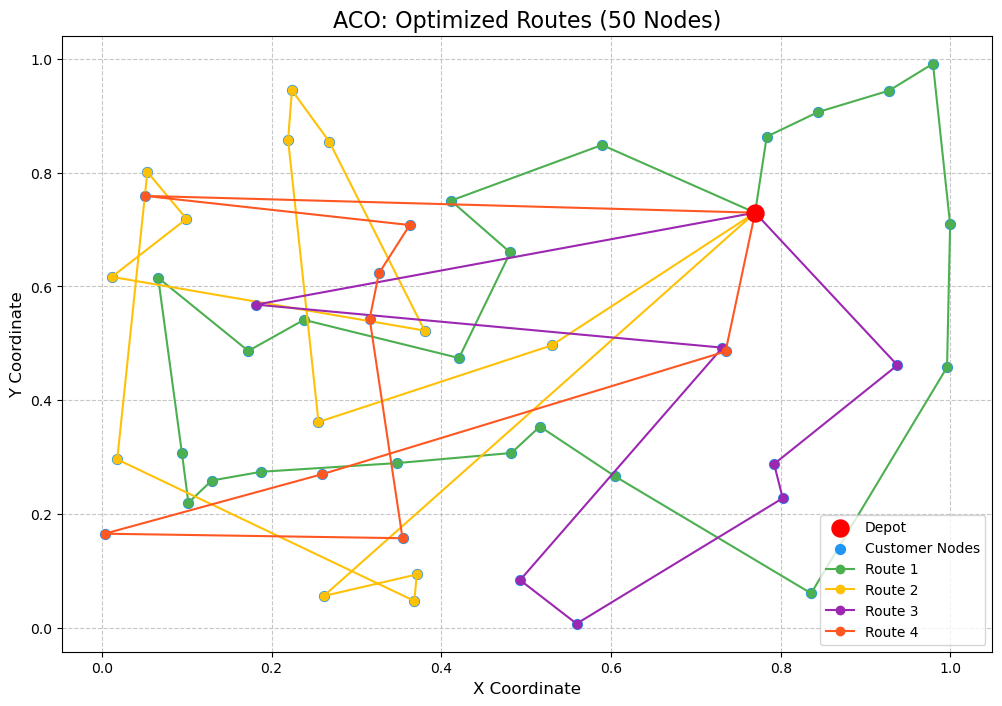

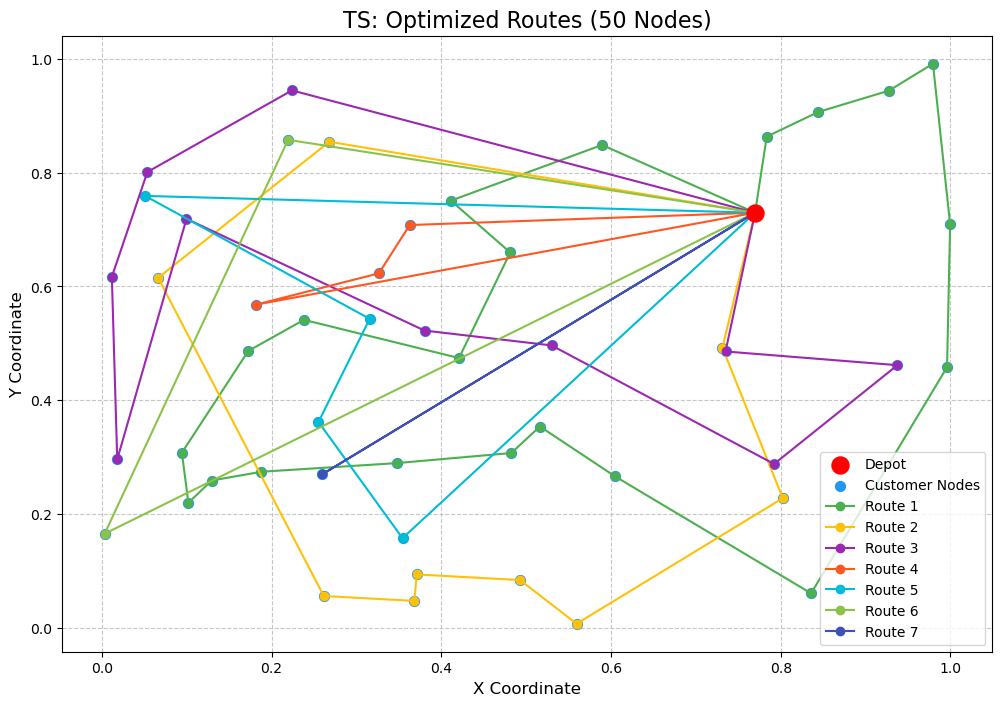

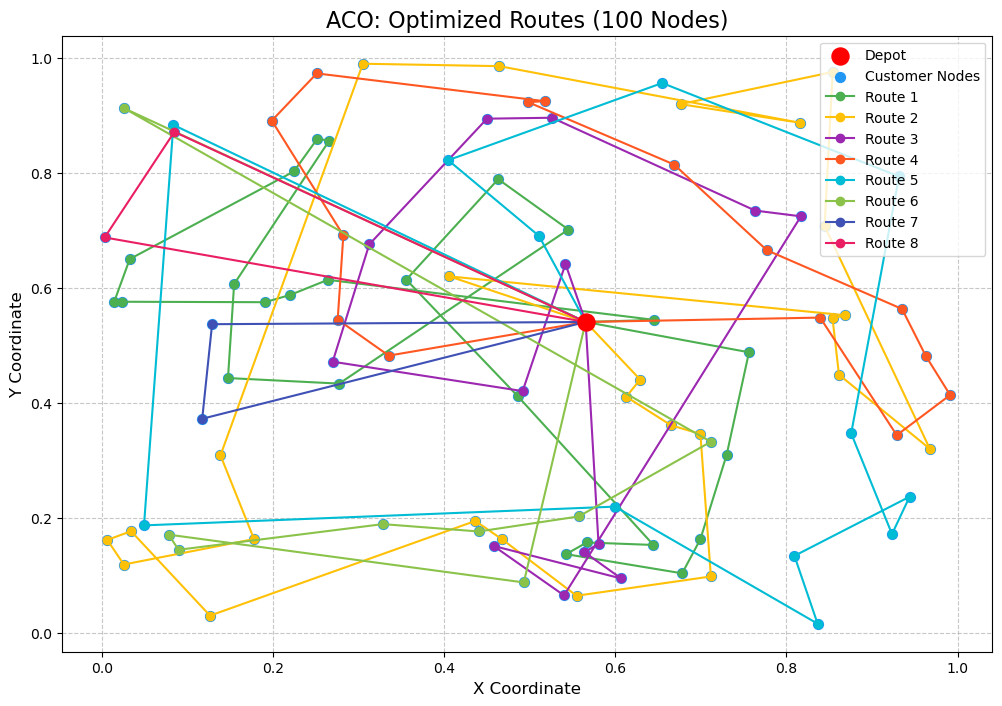

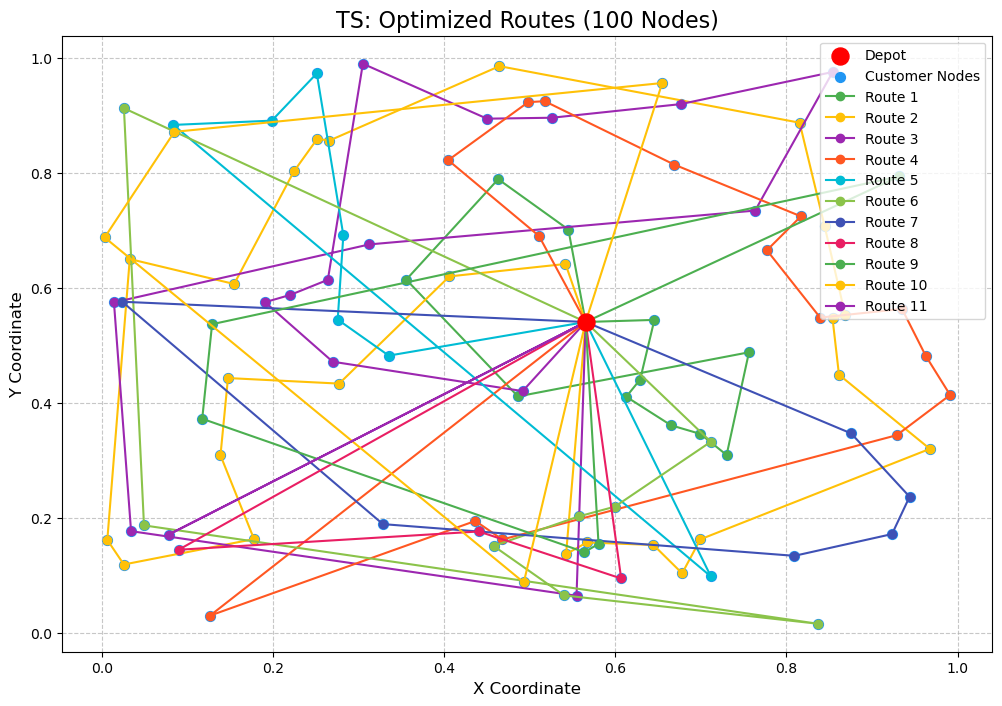

In [53]:
# Plot routes for all dataset sizes (20, 50, 100) for both ACO and Tabu Search
for size in ["20", "50", "100"]:
    # ACO visualization
    plot_routes(
        datasets[size][0],
        aco_results[size]["solution"],
        f"ACO: Optimized Routes ({size} Nodes)"
    )

    # Tabu Search visualization
    plot_routes(
        datasets[size][0],
        tabu_results[size]["solution"],
        f"TS: Optimized Routes ({size} Nodes)"
    )

**Convergence visualization**

Running ACO for dataset size 20 nodes...
Best Distance for 20 nodes: 7.76330005605875
Running ACO for dataset size 50 nodes...
Best Distance for 50 nodes: 13.374746510511677
Running ACO for dataset size 100 nodes...
Best Distance for 100 nodes: 24.929491351966387


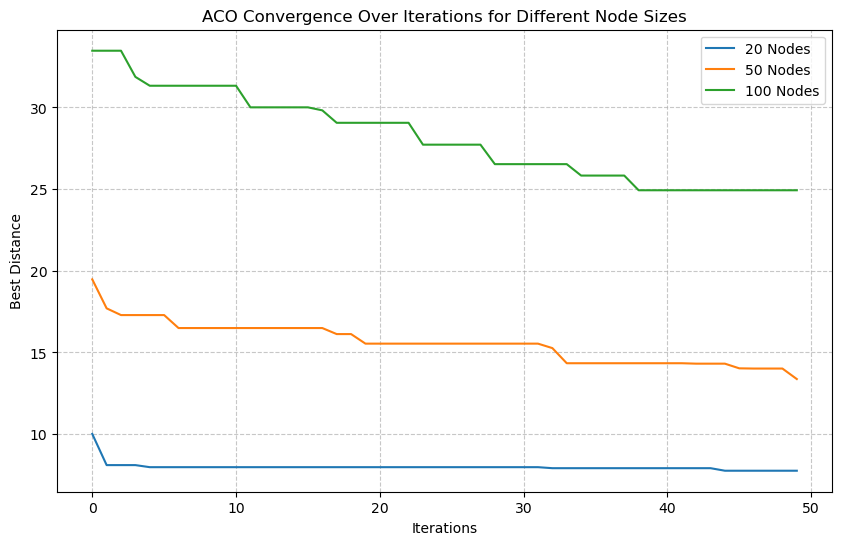

In [56]:
# Initialize lists to store convergence data for each dataset size
convergence_results = {}

# Run ACO for 20, 50, and 100 node datasets
for size in ["20", "50", "100"]:
    print(f"Running ACO for dataset size {size} nodes...")
    best_solution, best_distance, convergence = ant_colony_optimization(
        datasets[size][0], num_ants, max_iter, alpha, beta, rho, q
    )
    convergence_results[size] = convergence
    print(f"Best Distance for {size} nodes: {best_distance}")

# Plot convergence for each dataset size
plt.figure(figsize=(10, 6))
for size in ["20", "50", "100"]:
    plt.plot(
        convergence_results[size],
        label=f"{size} Nodes"
    )

plt.xlabel("Iterations")
plt.ylabel("Best Distance")
plt.title("ACO Convergence Over Iterations for Different Node Sizes")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The convergence plot for ACO demonstrates a steady decrease in the total distance over iterations for all dataset sizes (20, 50, and 100 nodes). The algorithm exhibits significant improvement in the early iterations, particularly for larger datasets, where the best distance shows considerable drops initially. This reflects the algorithm's ability to explore the solution space effectively by leveraging pheromone updates and heuristic information. However, as iterations progress, the improvements taper off, suggesting that ACO converges to a near-optimal solution relatively quickly. For smaller datasets like 20 nodes, the convergence stabilizes early, indicating that the solution space is less complex compared to larger datasets. This behavior showcases ACO's ability to balance exploration and exploitation as the algorithm progresses.

Running Tabu Search for dataset size 20 nodes...
Best Distance for 20 nodes: 9.25721690964511
Running Tabu Search for dataset size 50 nodes...
Best Distance for 50 nodes: 16.48575084766051
Running Tabu Search for dataset size 100 nodes...
Best Distance for 100 nodes: 28.1208350452864


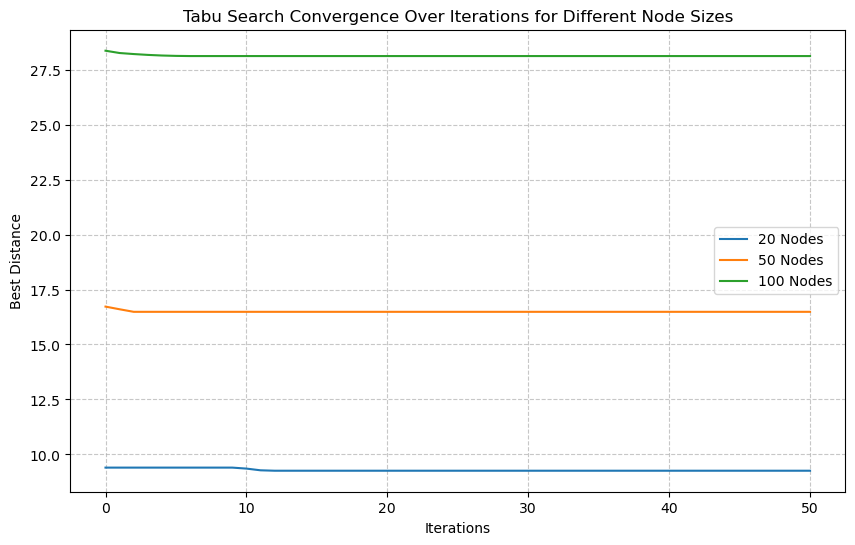

In [57]:
# Initialize lists to store convergence data for Tabu Search for each dataset size
tabu_convergence_results = {}

# Run Tabu Search for 20, 50, and 100 node datasets
for size in ["20", "50", "100"]:
    print(f"Running Tabu Search for dataset size {size} nodes...")
    best_solution, best_distance, convergence = tabu_search(
        datasets[size][0], max_iter, tabu_size
    )
    tabu_convergence_results[size] = convergence
    print(f"Best Distance for {size} nodes: {best_distance}")

# Plot convergence for each dataset size
plt.figure(figsize=(10, 6))
for size in ["20", "50", "100"]:
    plt.plot(
        tabu_convergence_results[size],
        label=f"{size} Nodes"
    )

plt.xlabel("Iterations")
plt.ylabel("Best Distance")
plt.title("Tabu Search Convergence Over Iterations for Different Node Sizes")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The convergence plot for Tabu Search reveals a different pattern compared to ACO, with the best distance remaining relatively constant after a few initial iterations for all dataset sizes. This indicates that Tabu Search quickly finds a feasible solution and then refines it through neighborhood searches. However, the refinement appears limited for larger datasets, as the convergence curve flattens early, reflecting TS's reliance on local search strategies. The steady plateau in the convergence curves for 50 and 100 nodes suggests that TS might struggle to escape local optima in more complex solution spaces. For smaller datasets, the algorithm converges more effectively, as the problem's reduced complexity allows for better exploration and exploitation of the neighborhood structures.

## Discussion and Conclusion

The results of this project provide significant insights into solving the CVRPTW using Ant Colony Optimization (ACO) and Tabu Search (TS). Both algorithms effectively tackled the routing problem by generating feasible solutions that adhered to the capacity and time window constraints while striving to minimize the total travel distance. Below is a summary of the key findings, obstacles, and improvements for future iterations.

**Key Learnings**

1. Effectiveness of Algorithms:

    - ACO consistently outperformed TS in minimizing the total travel distance for all dataset sizes. For example, ACO achieved a distance of 7.76 for the 20-node dataset compared to TS's 9.26. This suggests that ACO's probabilistic exploration and pheromone-based learning are more effective for this problem.
    - TS generated slightly longer routes but required fewer iterations to converge. For larger datasets like the 100-node instance, TS's distance of 28.12 was higher than ACO's 23.67, but it demonstrated strong robustness in generating feasible routes under tight constraints.

2. Scalability:

    - Both algorithms scaled reasonably well with increasing dataset sizes, though ACO required more iterations to refine solutions. TS's convergence was faster but showed reduced optimization quality for larger datasets.

3. Optimization Trade-offs:

    - While ACO achieved better distances, it required tuning more hyperparameters (e.g., alpha, beta, rho) and involved higher computational overhead due to its iterative pheromone updates. TS, with its simpler implementation, was quicker to deploy but required careful consideration of the Tabu List size to avoid suboptimal solutions.

**Obstacles Encountered**

1. Hyperparameter Sensitivity:

    - ACO's performance was sensitive to the values of parameters such as alpha, beta, and rho. Tuning these values required significant time and multiple iterations to strike a balance between exploration and exploitation.
    
2. Complexity with Larger Datasets:

    - For the 100-node dataset, both algorithms struggled with increasing computational demands. ACO required more time to compute pheromone updates across larger solution spaces, while TS needed efficient neighbor generation to avoid stagnation.

**Future directions**

1. Incorporate Hybrid Techniques:

    - Explore hybrid approaches that combine ACO's global exploration with TS's local search capabilities to improve both convergence speed and solution quality.

2. Parallelization:

    - Implement parallel processing, especially for ACO, to distribute pheromone updates and improve computational efficiency for larger datasets.

3. Benchmarking:

    - Compare ACO and TS with other advanced algorithms like Genetic Algorithms or Simulated Annealing to understand their relative performance further.

4. Dynamic Constraints:

    - Extend the problem to include dynamic constraints, such as real-time traffic conditions or changing customer demands, to simulate real-world challenges more closely.

**Conclusion**

- ACO minimized total travel distances effectively: achieving 7.76 for 20 nodes, 13.69 for 50 nodes, and 23.67 for 100 nodes.
- TS performed reasonably well but lagged slightly behind in distance optimization, with results of 9.26 (20 nodes), 16.49 (50 nodes), and 28.12 (100 nodes).
- Both algorithms adhered to vehicle capacity and time window constraints, validating their effectiveness in solving constrained optimization problems.

By balancing solution quality, computational effort, and scalability, ACO emerged as the better algorithm for this specific CVRPTW dataset. However, incorporating hybrid strategies and optimizing the implementation of TS could provide a more comprehensive exploration of potential solutions in future iterations.

### References

- https://github.com/jokofa/JAMPR/tree/master
- http://www.scholarpedia.org/article/Ant_colony_optimization
- https://www.sciencedirect.com/topics/computer-science/tabu-search-algorithm
- https://www.mdpi.com/2813-2203/2/1/1